In [29]:
import pandas as pd

In [30]:
df = pd.read_excel("df_joined.xlsx") #reading excel file

In [31]:
df.drop(columns=["VisitYear_cat", "VisitMonth_name"], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionId  52922 non-null  int64 
 1   UserId         52922 non-null  int64 
 2   VisitYear      52922 non-null  int64 
 3   VisitMonth     52922 non-null  int64 
 4   VisitMode      52922 non-null  object
 5   AttractionId   52922 non-null  int64 
 6   Rating         52922 non-null  int64 
 7   Attraction     52922 non-null  object
 8   Continent      52922 non-null  object
 9   Region         52922 non-null  object
 10  Country        52922 non-null  object
 11  CityName       52922 non-null  object
dtypes: int64(6), object(6)
memory usage: 4.8+ MB


In [33]:
df.nunique()

TransactionId    52922
UserId           33526
VisitYear           10
VisitMonth          12
VisitMode            5
AttractionId        30
Rating               5
Attraction          30
Continent            5
Region              22
Country            153
CityName          5545
dtype: int64

In [34]:
df['VisitMode'].unique()


array(['Couples', 'Friends', 'Family', 'Solo', 'Business'], dtype=object)

In [35]:
df['Attraction'].unique()

array(['Sacred Monkey Forest Sanctuary', 'Waterbom Bali',
       'Seminyak Beach', 'Nusa Dua Beach', 'Sanur Beach',
       'Uluwatu Temple', 'Tegalalang Rice Terrace',
       'Tegenungan Waterfall', 'Tanah Lot Temple', 'Kuta Beach - Bali',
       'Bromo Tengger Semeru National Park', 'Mount Semeru Volcano',
       'Jodipan Colorful Village', 'Sempu Island', 'Balekambang Beach',
       'Coban Rondo Waterfall', 'Goa Cina Beach', 'Malang City Square',
       'Museum Malang Tempo Doeloe', 'Khayangan Reflexology & Massage',
       'Jomblang Cave', 'Kalibiru National Park', 'Malioboro Road',
       'Merapi Volcano', 'Ramayana Ballet at Prambanan',
       'Ratu Boko Temple', 'Sewu Temple', 'Ullen Sentalu Museum',
       'Water Castle (Tamansari)', 'Yogyakarta Palace'], dtype=object)

In [36]:
# 1) Direct mapping for the attractions you listed
attraction_to_cat = {
    'Sacred Monkey Forest Sanctuary': 'Nature & Outdoors',
    'Waterbom Bali': 'Activities & Entertainment',
    'Seminyak Beach': 'Beach',
    'Nusa Dua Beach': 'Beach',
    'Sanur Beach': 'Beach',
    'Uluwatu Temple': 'Religious Site',
    'Tegalalang Rice Terrace': 'Nature & Outdoors',
    'Tegenungan Waterfall': 'Nature & Outdoors',
    'Tanah Lot Temple': 'Religious Site',
    'Kuta Beach - Bali': 'Beach',
    'Bromo Tengger Semeru National Park': 'Nature & Outdoors',
    'Mount Semeru Volcano': 'Nature & Outdoors',
    'Jodipan Colorful Village': 'Culture & History',
    'Sempu Island': 'Nature & Outdoors',
    'Balekambang Beach': 'Beach',
    'Coban Rondo Waterfall': 'Nature & Outdoors',
    'Goa Cina Beach': 'Beach',
    'Malang City Square': 'Urban & Shopping',
    'Museum Malang Tempo Doeloe': 'Culture & History',
    'Khayangan Reflexology & Massage': 'Activities & Entertainment',
    'Jomblang Cave': 'Nature & Outdoors',
    'Kalibiru National Park': 'Nature & Outdoors',
    'Malioboro Road': 'Urban & Shopping',
    'Merapi Volcano': 'Nature & Outdoors',
    'Ramayana Ballet at Prambanan': 'Activities & Entertainment',
    'Ratu Boko Temple': 'Religious Site',
    'Sewu Temple': 'Religious Site',
    'Ullen Sentalu Museum': 'Culture & History',
    'Water Castle (Tamansari)': 'Culture & History',
    'Yogyakarta Palace': 'Culture & History',
}



creating new df 

In [37]:
import numpy as np

# Add sin encoding for VisitMonth
df['VisitMonth_sin'] = np.sin(2 * np.pi * (df['VisitMonth'] - 1) / 12)


In [38]:
# Count unique values in Attraction column
num_unique_attractions = df['Attraction'].nunique()

print("Number of unique attractions:", num_unique_attractions)
print("Unique attractions list:", df['Attraction'].unique())

Number of unique attractions: 30
Unique attractions list: ['Sacred Monkey Forest Sanctuary' 'Waterbom Bali' 'Seminyak Beach'
 'Nusa Dua Beach' 'Sanur Beach' 'Uluwatu Temple' 'Tegalalang Rice Terrace'
 'Tegenungan Waterfall' 'Tanah Lot Temple' 'Kuta Beach - Bali'
 'Bromo Tengger Semeru National Park' 'Mount Semeru Volcano'
 'Jodipan Colorful Village' 'Sempu Island' 'Balekambang Beach'
 'Coban Rondo Waterfall' 'Goa Cina Beach' 'Malang City Square'
 'Museum Malang Tempo Doeloe' 'Khayangan Reflexology & Massage'
 'Jomblang Cave' 'Kalibiru National Park' 'Malioboro Road'
 'Merapi Volcano' 'Ramayana Ballet at Prambanan' 'Ratu Boko Temple'
 'Sewu Temple' 'Ullen Sentalu Museum' 'Water Castle (Tamansari)'
 'Yogyakarta Palace']


In [39]:
# Define mapping of attractions to buckets
bucket_mapping = {
    # Nature/Wildlife
    'Sacred Monkey Forest Sanctuary': 'Nature/Wildlife',
    'Tegalalang Rice Terrace': 'Nature/Wildlife',
    'Tegenungan Waterfall': 'Nature/Wildlife',
    'Bromo Tengger Semeru National Park': 'Nature/Wildlife',
    'Mount Semeru Volcano': 'Nature/Wildlife',
    'Jomblang Cave': 'Nature/Wildlife',
    'Kalibiru National Park': 'Nature/Wildlife',
    'Merapi Volcano': 'Nature/Wildlife',

    # Beach
    'Seminyak Beach': 'Beach',
    'Nusa Dua Beach': 'Beach',
    'Sanur Beach': 'Beach',
    'Kuta Beach - Bali': 'Beach',
    'Sempu Island': 'Beach',
    'Balekambang Beach': 'Beach',
    'Goa Cina Beach': 'Beach',

    # Temple
    'Uluwatu Temple': 'Temple',
    'Tanah Lot Temple': 'Temple',
    'Ratu Boko Temple': 'Temple',
    'Sewu Temple': 'Temple',
    'Ullen Sentalu Museum': 'Temple',
    'Water Castle (Tamansari)': 'Temple',
    'Yogyakarta Palace': 'Temple',

    # Entertainment/Adventure
    'Waterbom Bali': 'Entertainment/Adventure',
    'Khayangan Reflexology & Massage': 'Entertainment/Adventure',
    'Ramayana Ballet at Prambanan': 'Entertainment/Adventure',

    # City/Cultural
    'Jodipan Colorful Village': 'City/Cultural',
    'Malang City Square': 'City/Cultural',
    'Museum Malang Tempo Doeloe': 'City/Cultural',
    'Malioboro Road': 'City/Cultural'
}

# Create new bucket column
df['Attraction_Bucket'] = df['Attraction'].map(bucket_mapping)

# Distribution
bucket_distribution = df['Attraction_Bucket'].value_counts(normalize=True) * 100
print(bucket_distribution)


Attraction_Bucket
Nature/Wildlife            45.703369
Beach                      20.744510
Temple                     17.858021
Entertainment/Adventure    12.926779
City/Cultural               2.767322
Name: proportion, dtype: float64


In [40]:
# Define mapping from old 5-bucket to new 3-bucket system
bucket_map = {
    'Nature/Wildlife': 'Nature/Outdoors',
    'Beach': 'Nature/Outdoors',
    'Temple': 'Cultural/Historical',
    'City/Cultural': 'Cultural/Historical',
    'Entertainment/Adventure': 'Entertainment/Adventure'
}

# Create the new column
df['Attraction_Bucket_3'] = df['Attraction_Bucket'].map(bucket_map)

# Check new distribution in %
dist = df['Attraction_Bucket_3'].value_counts(normalize=True) * 100
print(dist)


Attraction_Bucket_3
Nature/Outdoors            66.447879
Cultural/Historical        20.625343
Entertainment/Adventure    12.926779
Name: proportion, dtype: float64


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionId        52922 non-null  int64  
 1   UserId               52922 non-null  int64  
 2   VisitYear            52922 non-null  int64  
 3   VisitMonth           52922 non-null  int64  
 4   VisitMode            52922 non-null  object 
 5   AttractionId         52922 non-null  int64  
 6   Rating               52922 non-null  int64  
 7   Attraction           52922 non-null  object 
 8   Continent            52922 non-null  object 
 9   Region               52922 non-null  object 
 10  Country              52922 non-null  object 
 11  CityName             52922 non-null  object 
 12  VisitMonth_sin       52922 non-null  float64
 13  Attraction_Bucket    52867 non-null  object 
 14  Attraction_Bucket_3  52867 non-null  object 
dtypes: float64(1), int64(6), object(8)
m

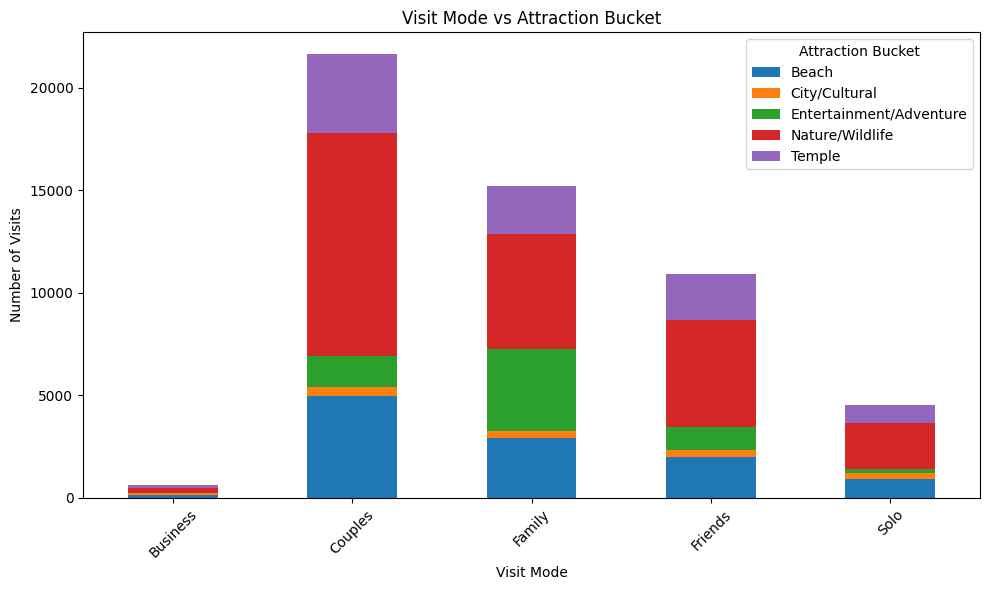

In [42]:
import matplotlib.pyplot as plt

# Group and pivot for plotting
visit_bucket_counts = df.groupby(["VisitMode", "Attraction_Bucket"]).size().unstack(fill_value=0)

# Plot
visit_bucket_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Visit Mode vs Attraction Bucket")
plt.xlabel("Visit Mode")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.legend(title="Attraction Bucket")
plt.tight_layout()
plt.show()


Counts:
 Attraction
Merapi Volcano                        87
Nusa Dua Beach                        66
Sacred Monkey Forest Sanctuary        59
Malioboro Road                        53
Uluwatu Temple                        48
Tegalalang Rice Terrace               39
Kuta Beach - Bali                     37
Ullen Sentalu Museum                  36
Sanur Beach                           33
Tanah Lot Temple                      29
Waterbom Bali                         21
Bromo Tengger Semeru National Park    19
Tegenungan Waterfall                  17
Yogyakarta Palace                     17
Seminyak Beach                        15
Ramayana Ballet at Prambanan          14
Ratu Boko Temple                       7
Sewu Temple                            6
Jomblang Cave                          5
Mount Semeru Volcano                   3
Malang City Square                     3
Water Castle (Tamansari)               3
Kalibiru National Park                 1
Museum Malang Tempo Doeloe           

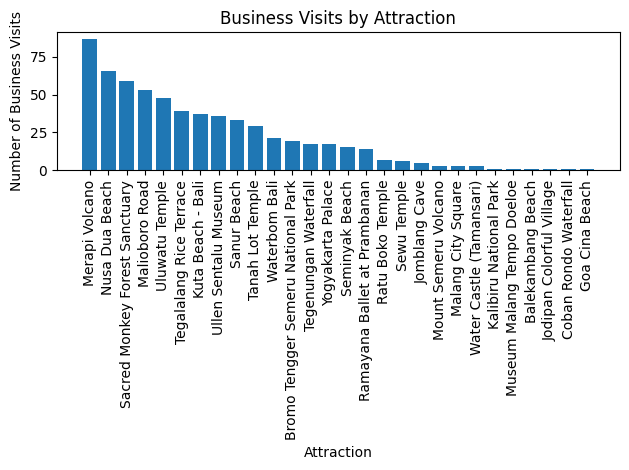

In [16]:
# Filter only Business visit mode
business_df = df[df["VisitMode"] == "Business"]

# Group by Attraction and count
business_attraction_counts = business_df["Attraction"].value_counts()

# Show counts
print("Counts:\n", business_attraction_counts)

# Show percentages
business_attraction_percent = (
    business_df["Attraction"].value_counts(normalize=True) * 100
).round(2)

print("\nPercentages:\n", business_attraction_percent)

# Plot
import matplotlib.pyplot as plt

plt.bar(business_attraction_counts.index, business_attraction_counts.values)
plt.xlabel("Attraction")
plt.ylabel("Number of Business Visits")
plt.title("Business Visits by Attraction")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.tight_layout()
plt.show()


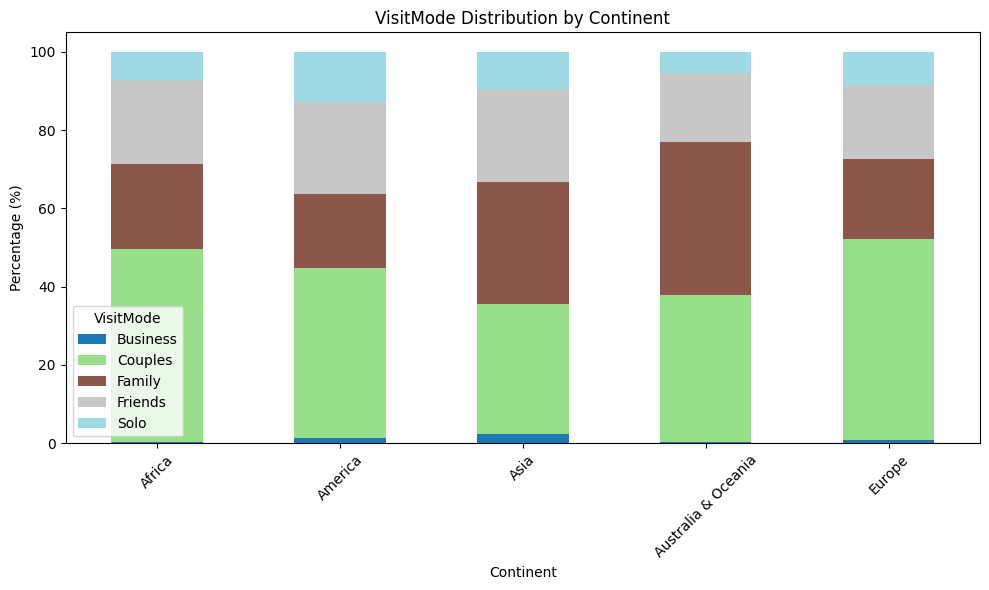

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by Continent and VisitMode, count occurrences
continent_visitmode = df.groupby(['Continent', 'VisitMode']).size().unstack(fill_value=0)

# Normalize by continent to see proportions
continent_visitmode_pct = continent_visitmode.div(continent_visitmode.sum(axis=1), axis=0) * 100

# Plot as stacked bar chart
continent_visitmode_pct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('VisitMode Distribution by Continent')
plt.ylabel('Percentage (%)')
plt.xlabel('Continent')
plt.legend(title='VisitMode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


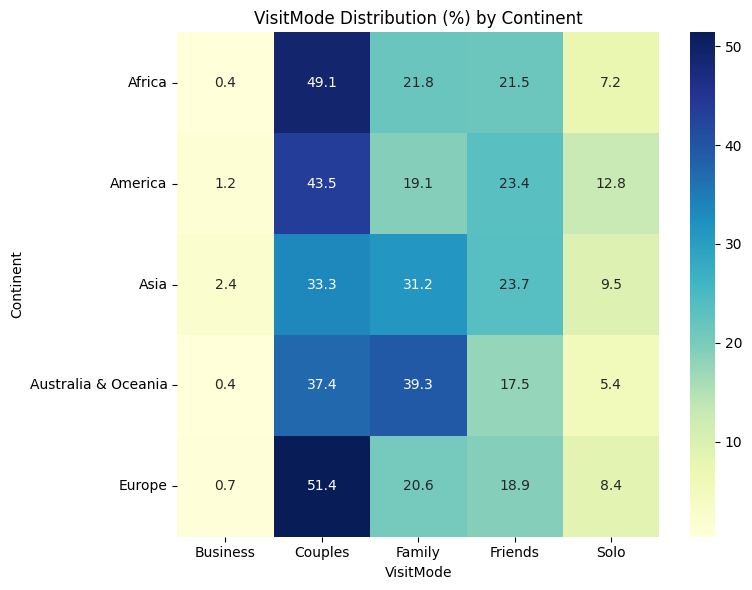

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by Continent and VisitMode
continent_visitmode = df.groupby(['Continent', 'VisitMode']).size().unstack(fill_value=0)

# Normalize by row to get percentage distribution
continent_visitmode_pct = continent_visitmode.div(continent_visitmode.sum(axis=1), axis=0) * 100

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(continent_visitmode_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("VisitMode Distribution (%) by Continent")
plt.ylabel("Continent")
plt.xlabel("VisitMode")
plt.tight_layout()
plt.show()


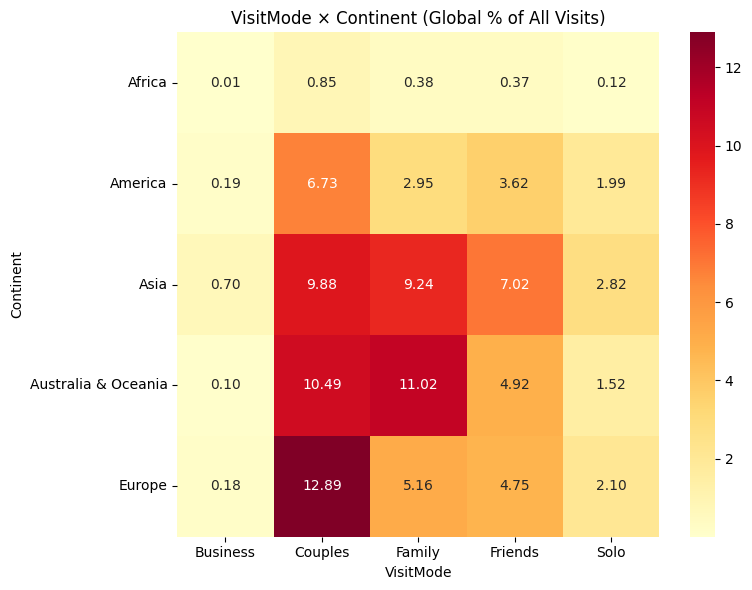

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences
continent_visitmode = df.groupby(['Continent', 'VisitMode']).size().unstack(fill_value=0)

# Normalize across the entire table (global percentages)
continent_visitmode_global_pct = continent_visitmode / continent_visitmode.sum().sum() * 100

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(continent_visitmode_global_pct, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("VisitMode × Continent (Global % of All Visits)")
plt.ylabel("Continent")
plt.xlabel("VisitMode")
plt.tight_layout()
plt.show()


In [46]:
visitmode_counts = df['VisitMode'].value_counts().reset_index()
visitmode_counts.columns = ['VisitMode', 'Number_of_Visits']
visitmode_counts


,VisitMode,Number_of_Visits
0,Couples,21617
1,Family,15215
2,Friends,10944
3,Solo,4523
4,Business,623


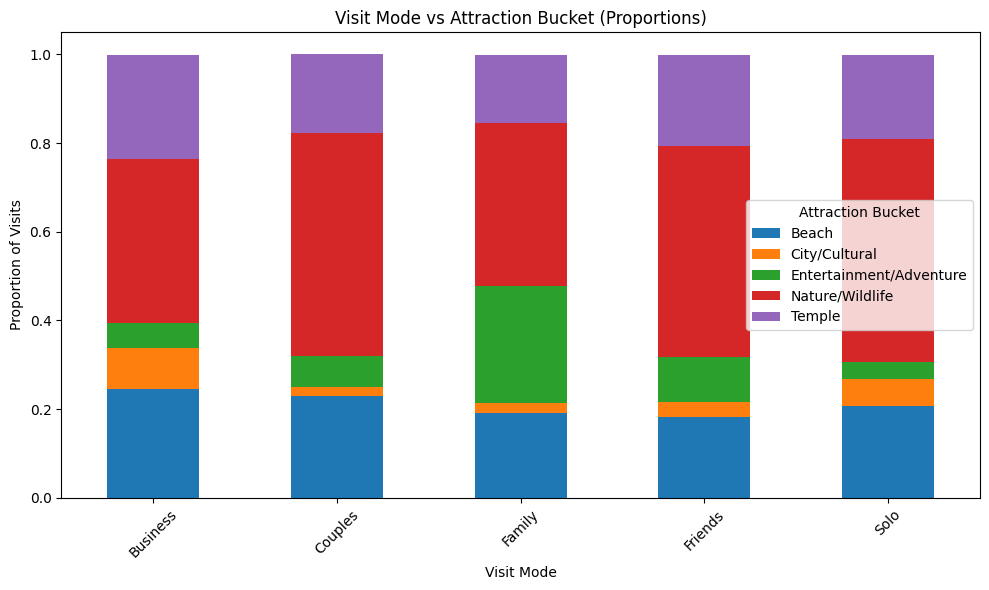

In [47]:
import matplotlib.pyplot as plt

# Group and pivot
visit_bucket_props = (
    df.groupby(["VisitMode", "Attraction_Bucket"]).size()
    / df.groupby("VisitMode").size()
).unstack(fill_value=0)

# Plot
visit_bucket_props.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Visit Mode vs Attraction Bucket (Proportions)")
plt.xlabel("Visit Mode")
plt.ylabel("Proportion of Visits")
plt.xticks(rotation=45)
plt.legend(title="Attraction Bucket")
plt.tight_layout()
plt.show()


In [48]:
# Filter only Business visit mode
business_df = df[df["VisitMode"] == "Business"]

# Count attraction buckets for Business mode
business_bucket_counts = business_df["Attraction_Bucket"].value_counts()

print(business_bucket_counts)


Attraction_Bucket
Nature/Wildlife            230
Beach                      153
Temple                     146
City/Cultural               58
Entertainment/Adventure     35
Name: count, dtype: int64


VisitMonth
1     43
2     40
3     54
4     61
5     65
6     44
7     48
8     59
9     62
10    56
11    51
12    40
Name: count, dtype: int64
VisitMonth
1      6.90
2      6.42
3      8.67
4      9.79
5     10.43
6      7.06
7      7.70
8      9.47
9      9.95
10     8.99
11     8.19
12     6.42
Name: proportion, dtype: float64


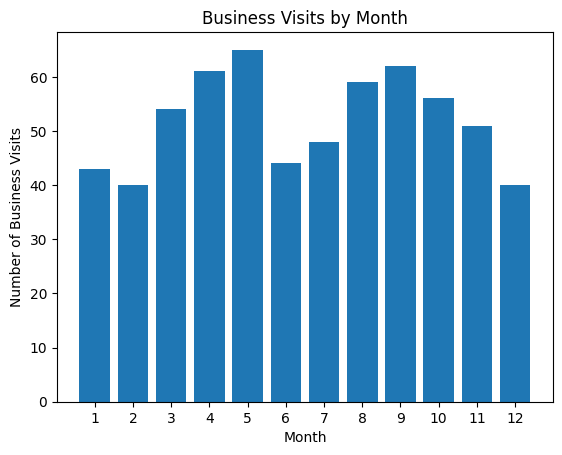

In [49]:
# Filter only Business visit mode
business_df = df[df["VisitMode"] == "Business"]

# Count visits per month for Business
business_month_counts = business_df["VisitMonth"].value_counts().sort_index()

# Display counts
print(business_month_counts)

# Also as percentages
business_month_percent = (
    business_df["VisitMonth"].value_counts(normalize=True).sort_index() * 100
).round(2)

print(business_month_percent)

# Optional: Plot
import matplotlib.pyplot as plt

plt.bar(business_month_counts.index, business_month_counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Business Visits")
plt.title("Business Visits by Month")
plt.xticks(range(1, 13))
plt.show()


In [50]:
import pandas as pd

# Calculate User_AvgRating
user_avg_rating = df.groupby('UserId')['Rating'].mean().reset_index()
user_avg_rating.rename(columns={'Rating': 'User_AvgRating'}, inplace=True)

# Calculate User_TotalTrips
user_total_trips = df.groupby('UserId').size().reset_index(name='User_TotalTrips')

# Merge into main df
df = df.merge(user_avg_rating, on='UserId', how='left')
df = df.merge(user_total_trips, on='UserId', how='left')

print(df[['UserId', 'User_AvgRating', 'User_TotalTrips']].head())


   UserId  User_AvgRating  User_TotalTrips
0   70456             5.0                1
1    7567             5.0                1
2   79069             5.0                1
3   31019             3.0                2
4   43611             3.0                3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionId        52922 non-null  int64  
 1   UserId               52922 non-null  int64  
 2   VisitYear            52922 non-null  int64  
 3   VisitMonth           52922 non-null  int64  
 4   VisitMode            52922 non-null  object 
 5   AttractionId         52922 non-null  int64  
 6   Rating               52922 non-null  int64  
 7   Attraction           52922 non-null  object 
 8   Continent            52922 non-null  object 
 9   Region               52922 non-null  object 
 10  Country              52922 non-null  object 
 11  CityName             52922 non-null  object 
 12  VisitMonth_sin       52922 non-null  float64
 13  Attraction_Bucket    52867 non-null  object 
 14  Attraction_Bucket_3  52867 non-null  object 
 15  User_AvgRating       52922 non-null 

In [52]:
# Export df to Excel
df.to_excel("df_for_km.xlsx", index=False)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [54]:
# Features & target
features = ["VisitMonth_sin", "Attraction_Bucket_3", "User_AvgRating", "User_TotalTrips"]
target = "VisitMode"

In [55]:
# Drop NaNs in selected features
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

In [56]:
# Train-test split (stratify to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [57]:
# Preprocessing
numeric_features = ["VisitMonth_sin", "User_AvgRating", "User_TotalTrips"]
categorical_features = ["Attraction_Bucket_3"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [58]:
# Pipeline with SMOTE
clf = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])


In [59]:
# Train
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['VisitMonth_sin',
                                                   'User_AvgRating',
                                                   'User_TotalTrips']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Attraction_Bucket_3'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [60]:
# Predict & evaluate
y_pred = clf.predict(X_test)
print("=== Classification Report (SMOTE + RF) ===")
print(classification_report(y_test, y_pred))

=== Classification Report (SMOTE + RF) ===
              precision    recall  f1-score   support

    Business       0.02      0.30      0.04       124
     Couples       0.50      0.34      0.40      4322
      Family       0.48      0.37      0.42      3039
     Friends       0.29      0.21      0.24      2185
        Solo       0.13      0.30      0.18       904

    accuracy                           0.32     10574
   macro avg       0.28      0.30      0.26     10574
weighted avg       0.41      0.32      0.35     10574



with interaction terms

In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib

In [73]:
# Drop missing rows (from Attraction_Bucket_3 etc.)
df = df.dropna(subset=['Attraction_Bucket_3'])

In [74]:
# Features and target
X = df[[
    'VisitMonth_sin', 'User_AvgRating', 'User_TotalTrips',
    'Attraction_Bucket_3', 'Region', 'Continent', 'Attraction'
]]
y = df['VisitMode']

In [75]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [76]:
# Column types
numeric_features = ['VisitMonth_sin', 'User_AvgRating', 'User_TotalTrips']
categorical_features = ['Attraction_Bucket_3', 'Region', 'Continent', 'Attraction']

In [77]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [78]:
# Final model pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [79]:
# Fit the model
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['VisitMonth_sin',
                                                   'User_AvgRating',
                                                   'User_TotalTrips']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Attraction_Bucket_3',
                                                   'Region', 'Continent',
                                                   'Attraction'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [80]:
# Evaluate
y_pred = clf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Business       0.08      0.31      0.13       155
     Couples       0.53      0.47      0.50      5403
      Family       0.48      0.46      0.47      3799
     Friends       0.32      0.29      0.30      2731
        Solo       0.19      0.30      0.23      1129

    accuracy                           0.41     13217
   macro avg       0.32      0.36      0.33     13217
weighted avg       0.44      0.41      0.42     13217



In [82]:
# Save model
joblib.dump(clf_pipeline, "visitmode_classifier.pkl")

['visitmode_classifier.pkl']

In [81]:
df.to_excel("df_for_classification.xlsx", index=False)


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [84]:
# Load dataset
df = pd.read_excel("df_for_classification.xlsx")

In [85]:
# Drop rows with missing values in required columns
df = df.dropna(subset=['Attraction_Bucket_3', 'Region', 'VisitMode'])

In [86]:
# Encode categorical features if needed
df_encoded = pd.get_dummies(df[['Attraction_Bucket_3', 'Region']], drop_first=True)

# Target
y = df['VisitMode']

In [87]:
# Split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

In [88]:
# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# Save model
joblib.dump(clf, "visitmode_classifier_minimal.pkl")
print("✅ Model saved as visitmode_classifier_minimal.pkl")


✅ Model saved as visitmode_classifier_minimal.pkl
